<a href="https://colab.research.google.com/github/rahuldave/StartingWithPython-ai1-fall2019/blob/master/mnist_keras_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# taken from lukas/ml-class
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from keras.callbacks import Callback
import json

# from wandb.keras import WandbCallback
# import wandb

# run = wandb.init()
# config = run.config





Using TensorFlow backend.


In [22]:
1+1

2

### Hello World

1. One
2. Two
3. Three

fhkjfhkjfhsdfskfhsdkfhsdfk
sdhjshsdjdfsjfgjsdhfg

- hello
- waorld
- gunnu

Hello the $\alpha$ ia a greek letter.

hello $$\alpha + \beta + \gamma = \delta$$

---

*alpha* **alpha**

In [3]:
a = (1, 2)
type(a)

tuple

In [5]:
a

(1, 2)

In [6]:
a[0] = 10

TypeError: ignored

In [61]:
class Config:pass

config = Config()
config.optimizer = "adam"
config.epochs = 40
config.hidden_nodes = 50

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
img_width = X_train.shape[1]
img_height = X_train.shape[2]

#

(60000, 28, 28) (60000,)


In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
#X_train = X_train.astype('float32')
#X_train /= 255.
#X_test = X_test.astype('float32')
#X_test /= 255.

# Normalize, change learning rate, play with layer size, batchsize

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
labels = range(10)

num_classes = y_train.shape[1]



In [64]:
y_train.shape

(60000, 10)

In [65]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [66]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [67]:
# create model
model = Sequential()
model.add(Flatten(input_shape=(img_width, img_height)))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(config.hidden_nodes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=config.optimizer,
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=config.epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 116us/step - loss: 6.6881 - acc: 0.5795 - val_loss: 5.6676 - val_acc: 0.6458
Epoch 2/40
60000/60000 [==============================] - 7s 111us/step - loss: 4.5002 - acc: 0.7176 - val_loss: 4.4267 - val_acc: 0.7224
Epoch 3/40
60000/60000 [==============================] - 7s 111us/step - loss: 4.1959 - acc: 0.7376 - val_loss: 4.4692 - val_acc: 0.7205
Epoch 4/40
60000/60000 [==============================] - 7s 109us/step - loss: 4.1960 - acc: 0.7380 - val_loss: 4.1058 - val_acc: 0.7442
Epoch 5/40
60000/60000 [==============================] - 7s 110us/step - loss: 4.1084 - acc: 0.7439 - val_loss: 4.0963 - val_acc: 0.7449
Epoch 6/40
60000/60000 [==============================] - 7s 111us/step - loss: 4.1062 - acc: 0.7442 - val_loss: 4.0276 - val_acc: 0.7497
Epoch 7/40
60000/60000 [==============================] - 7s 113us/step - loss: 4.0888 - acc: 0.7454 - val_loss: 4.0075 - 

In [69]:
history.

SyntaxError: ignored

In [70]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [0]:
epochs = history.epoch

In [72]:
type(history.history)

dict

In [73]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [74]:
history.history['acc']

[0.5794833333333334,
 0.7176166666666667,
 0.7376,
 0.7379666666666667,
 0.74385,
 0.74425,
 0.7454,
 0.7462333333333333,
 0.7515,
 0.7494333333333333,
 0.7509333333333333,
 0.7535833333333334,
 0.7467333333333334,
 0.75055,
 0.7564166666666666,
 0.745,
 0.7525666666666667,
 0.75335,
 0.7512333333333333,
 0.7523166666666666,
 0.7507333333333334,
 0.7487333333333334,
 0.7578,
 0.7490833333333333,
 0.75075,
 0.75895,
 0.75575,
 0.7573,
 0.7530833333333333,
 0.7551833333333333,
 0.7522166666666666,
 0.74545,
 0.754,
 0.7307666666666667,
 0.7523,
 0.75,
 0.7525333333333334,
 0.75335,
 0.7548166666666667,
 0.7586833333333334]

In [75]:
len(history.history['acc'])

40

In [0]:
import matplotlib.pyplot as plt

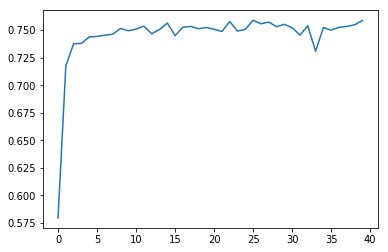

In [77]:
plt.plot(history.epoch, history.history['acc'])

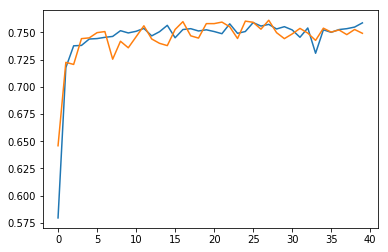

In [78]:
plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])

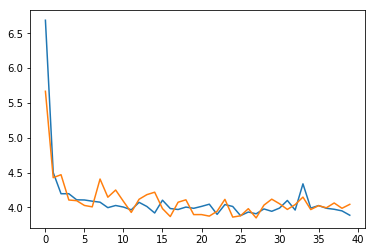

In [79]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [0]:
a = np.arange(-100, 100, 0.1)
b = np.arange(-100, 100, 0.1)
C  = lambda a, b: (a + b - 2)**2

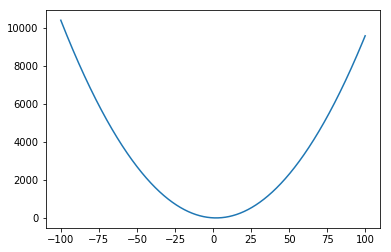

In [44]:
plt.plot(a, C(a, 0))

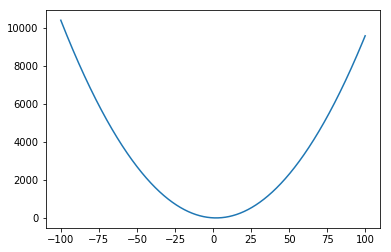

In [45]:
plt.plot(b, C(0, b))